In [1]:
"""
Polynomial Regression
1. Build a machine learning model to predict salary  based on position for a given dataset

"""

'\nPolynomial Regression\n1. Build a machine learning model to predict salary  based on position for a given dataset\n\n'

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#regression librarry
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures

#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [3]:
# load dataset
dataset_original = pd.read_csv ("Position_Salaries.csv")
dataset = dataset_original
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 10 rows and 3 Columns


In [5]:
dataset.sample()

,Position,Level,Salary
2,Senior Consultant,3,60000


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [9]:
# check for minimum dataset
dataset.min()

Position    Business Analyst
Level                      1
Salary                 45000
dtype: object

In [10]:
# checks for duplicate values
dataset.duplicated().sum()

0

In [24]:
dataset = dataset[['Level','Salary']]

In [25]:
# # Handle Missing data
# def handle_min_values(dataset):
#     # replace min values by mean
#     dataset.replace(0, dataset.mean(), inplace=True)
#     return dataset

# dataset = handle_min_values(dataset)

In [26]:
# #check dataset replace with mean or not
# dataset.min()

In [27]:
# # seperate fetures and label
# x_data = dataset.iloc[:, :-1].values
# y_data = dataset.iloc[:, 1].values

In [28]:
# # handle categorical data
# def handle_categorical_data(x_data):
#     #encode categorical data
#     label_encod = LabelEncoder()
#     x_data[:, 1] = label_encod.fit_transform(x_data[:, 1])
    
#     # one hot encoding
#     onehotencode = OneHotEncoder(categorical_features= [1])
#     x_data = onehotencode.fit_transform(x_data).toarray()
    
#     return x_data
    
# x_data = handle_categorical_data(x_data)

In [29]:
# #convert numpy.ndarray to DataFrame
# x_data = pd.DataFrame(x_data)
# x_data.shape

In [30]:
# create directory to store csv files
# os.mkdir("CSV_files")

In [31]:
# split dataset 

def splitdata(dataset):
    # split train and test data
    train, test = train_test_split(dataset,test_size = 0.20, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)

    # saving datasets into csv files
    test.to_csv('CSV_files/test_file.csv',index=False,encoding='utf-8')

    # divide train data into train and cross validation 
    train_data, crossV_data = train_test_split(train,test_size = 0.30,random_state=0)
    
     #load data into csv for train and cross validation
    train_data.to_csv('CSV_files/train_file.csv',index=False,encoding='utf-8')
    crossV_data.to_csv('CSV_files/CValidation_file.csv',index=False,encoding='utf-8')
    
    print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)

splitdata(dataset)

train :  (8, 2)  test :  (2, 2)
train_data :  (5, 2)  crossV_data :  (3, 2)


In [32]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 5 rows and 2 Columns


In [33]:
train_dataset.head()

,Level,Salary
0,6,150000
1,7,200000
2,5,110000
3,4,80000
4,8,300000


In [34]:
# x_train = train_dataset.iloc[:,:-1].values
# y_train = train_dataset.iloc[:,1].values  
    


In [36]:
# # fitting simple linear regression model to the training dataset
# # lin_reg = LinearRegression(normalize=True)  
# # lin_reg.fit( x_train, y_train)  

# # fitting polynomial regression model to the training dataset
# poly_reg = PolynomialFeatures(degree=3)
# x_poly = poly_reg.fit_transform(x_train)
# # fit into multiple Linear regression model
# lin_reg2 = LinearRegression()
# lin_reg2.fit(x_poly,y_train)

In [40]:
class Polynomial_Reg():
    
    def reference_module(self,x_train):
        # fitting polynomial regression model to the training dataset
        poly_reg = PolynomialFeatures(degree=4)
        x_poly = poly_reg.fit_transform(x_train)
#         x_poly=poly_reg.fit_transform(x_train)
        
        return poly_reg, x_poly
      

    def create_module(self,x_train,y_train, x_poly):
#         # fitting polynomial regression model to the training dataset
#         poly_reg = PolynomialFeatures(degree=4)
#         x_poly = poly_reg.fit_transform(x_train)
        # fit into multiple Linear regression model
        lin_reg2 = LinearRegression()
        lin_reg2.fit(x_poly,y_train)

        return poly_reg, lin_reg2
    
    def create_piklefile(self,poly_reg, lin_reg2):
        fileObject = open("train_data.pkl",'wb')       
        # dump train model pickle file
        file = open('Polynomial_RegModule.pkl', 'wb')
        pickle.dump(poly_reg,file)
        pickle.dump(lin_reg2,file)
        # here we close the fileObject
        file.close()          
        
    
    def y_prediction(self,x_train,lin_reg2,poly_reg):
        # predicting the train set result
#         y = lin_reg2.predict()
        y_pred_train=lin_reg2.predict(poly_reg.fit_transform(x_train))
        return y_pred_train
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        acc_r2 = r2_score(y_train, y_predict_train)*100      
#         acc_r2 = (1-error)*100
  
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab=( 1- (total_error / len(y_train))) *100
        
        mean_sq  = mean_squared_error(y_train, y_predict_train) 

        mean_sq_log = mean_squared_log_error(y_train, y_predict_train)  
    
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        
        return acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error
    

    
    def visualization(self,x_train,y_train,poly_reg, lin_reg2):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Training Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        

def main():
    #class obj created
    obj  = Polynomial_Reg()
    
    # seperate fetures and label
    # here we taking only 2 columns level and salary
    x_train = train_dataset.iloc[:,:-1].values
    y_train = train_dataset.iloc[:,1].values  
    
    poly_reg, x_poly = obj.reference_module(x_train)
#     y_train = y_train.reshape(-1, 1)
    print(x_train.shape, y_train.shape)
    poly_reg, lin_reg2 = obj.create_module(x_train,y_train, x_poly)
    print("\nModule created")
    
    obj.create_piklefile(poly_reg, lin_reg2)
    print("\nPikle file created")
    
    y_train_pre = obj.y_prediction(x_train,poly_reg, lin_reg2)
    print("\n\n y_prediction:",y_train_pre)
    
    acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error = obj.accuracy(y_train_pre,y_train)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)
    print("\n Accuracy train by mean_sq", mean_sq)
    print("\n Accuracy train by mean_sq_log", mean_sq_log)
    print("\n Accuracy train by median_ab_error", median_ab_error)
    
    
    
    obj.visualization(x_train,y_train, poly_reg, lin_reg2)

if __name__ == '__main__':
    main()


(5, 1) (5,)

Module created

Pikle file created


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [41]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 3 rows and 2 Columns


In [42]:
#     #cross validation
# file1 = open('SimpleLRModulefile.pkl', 'rb')
# reg1 = pickle.load(file1)



 y_prediction: [-210571.42857152  -62000.00000004  698000.        ]

 Accuracy train by acc_r2 72.0484822514522

 Accuracy train by median_ab_error 255571.4285715154


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

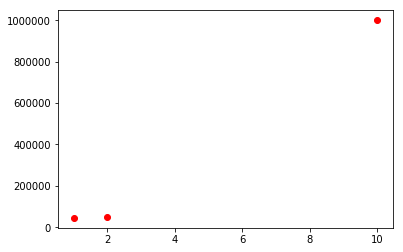

In [51]:
class Cross_validation():
           
    def y_prediction(self,poly_reg, lin_reg2,  x_cv):
        # predicting the test set result
        y_predict=lin_reg2.predict(poly_reg.fit_transform(x_cv))
        return y_predict
        
#         # predicting the test set result
#         return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        acc_r2 = r2_score(y_train, y_predict_train)*100
#         acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_cv,y_cv, lin_reg2,poly_reg):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
         # visualizing the testing set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_cv,y_cv,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Cross Validation Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values
 
    #     print(x_cv.shape,y_cv.shape)
    #cross validation
    file1 = open('Polynomial_RegModule.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(poly_reg, lin_reg2 , x_cv)
    print("\n\n y_prediction:",y_cv_pre)
    
    acc_r2, median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv, y_cv, reg1, poly_reg)

if __name__ == '__main__':
    main()


In [ ]:
# Here decision tree gives 100% or very small accuracy bcoz of overfitting and small amount of dataset